In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%; font-weight: bold}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%;}</style>"))

In [2]:
import pickle
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import preprocessing
import pandas as pd
import os
import time, os
import pymysql
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import ta
import warnings
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 600)

warnings.filterwarnings(action='ignore')



%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15,7)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def plot_roc_curve(trainY, testY, train_pred, test_pred, train_prob, test_prob):
    from sklearn.metrics import roc_curve, roc_auc_score, f1_score, f1_score, accuracy_score, recall_score, precision_score
    
    fpr, tpr, thresholds = roc_curve(testY, test_prob) # output 3개가 나오는데, 각 threshhold 마다의 fpr, tpr값 인듯
    
    train_f1 = f1_score(trainY, train_pred)
    test_f1 = f1_score(testY, test_pred)
    
    train_recall = recall_score(trainY, train_pred)
    test_recall = recall_score(testY, test_pred)
    
    
    train_pre = precision_score(trainY, train_pred)
    test_pre = precision_score(testY, test_pred)  
    
    train_acc = accuracy_score(trainY, train_pred)
    test_acc = accuracy_score(testY, test_pred)
    
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('test ROC : {}'.format(round(roc_auc_score(testY, test_prob),3)),fontsize=25)
    plt.legend()
    plt.show()
    print('train_f1 score: ',train_f1)
    print('test_f1 score: ',test_f1,'\n')
    
    print('train_recall score: ',train_recall)
    print('test_recall score: ',test_recall,'\n')

    print('train_pre score: ',train_pre)
    print('test_pre score: ',test_pre,'\n')
    
    print('train acc score: ',train_acc)
    print('test acc score: ',test_acc, '\n')

# 필요 데이터 및 모델 로드 

## 2019-2021 데이터 로드 

### data2019 로드 

In [4]:
import pickle
with open('./year_data/data2019_X.pickle', 'rb') as f:
    data2019_X = pickle.load(f)

In [5]:
import pickle
with open('./year_data/data2019_Y.pickle', 'rb') as f:
    data2019_Y = pickle.load(f)

In [7]:
import pickle
with open('./year_data/lst_2019_nc.pickle', 'rb') as f:
    lst_2019_nc = pickle.load(f)

In [8]:
import pickle
with open('./year_data/lst_2019_cd.pickle', 'rb') as f:
    lst_2019_cd = pickle.load(f)

In [9]:
import pickle
with open('./year_data/lst_2019_dt.pickle', 'rb') as f:
    lst_2019_dt = pickle.load(f)

### data2020 로드 

In [10]:
import pickle
with open('./year_data/data2020_X.pickle', 'rb') as f:
    data2020_X = pickle.load(f)

In [11]:
import pickle
with open('./year_data/data2020_Y.pickle', 'rb') as f:
    data2020_Y = pickle.load(f)

In [12]:
import pickle
with open('./year_data/lst_2020_nc.pickle', 'rb') as f:
    lst_2020_nc = pickle.load(f)

In [13]:
import pickle
with open('./year_data/lst_2020_cd.pickle', 'rb') as f:
    lst_2020_cd = pickle.load(f)

In [13]:
import pickle
with open('./year_data/lst_2020_dt.pickle', 'rb') as f:
    lst_2020_dt = pickle.load(f)

### data2021 로드 

In [14]:
import pickle
with open('./year_data/data2021_X.pickle', 'rb') as f:
    data2021_X = pickle.load(f)

In [15]:
import pickle
with open('./year_data/data2021_Y.pickle', 'rb') as f:
    data2021_Y = pickle.load(f)

In [16]:
import pickle
with open('./year_data/lst_2021_nc.pickle', 'rb') as f:
    lst_2021_nc = pickle.load(f)

In [17]:
import pickle
with open('./year_data/lst_2021_cd.pickle', 'rb') as f:
    lst_2021_cd = pickle.load(f)

In [18]:
import pickle
with open('./year_data/lst_2021_dt.pickle', 'rb') as f:
    lst_2021_dt = pickle.load(f)

### 데이터 개수 확인 

In [19]:
print('====2019 data====')
print(data2019_X.shape)
print(data2019_Y.shape)
print()
print('====2020 data====')
print(data2020_X.shape)
print(data2020_Y.shape)
print()
print('====2021 data====')
print(data2021_X.shape)
print(data2021_Y.shape)

====2019 data====
(60912, 560)
(60912,)

====2020 data====
(71133, 560)
(71133,)

====2021 data====
(64768, 560)
(64768,)


=============== data2019_Y 의 label ===============
1의 개수:10026, 0의 개수:50886, 1의 비율:0.16459810874704492
=============== data2020_Y 의 label ===============
1의 개수:15843, 0의 개수:55290, 1의 비율:0.22272363038252288
=============== data2021_Y 의 label ===============
1의 개수:12799, 0의 개수:51969, 1의 비율:0.19761301877470355


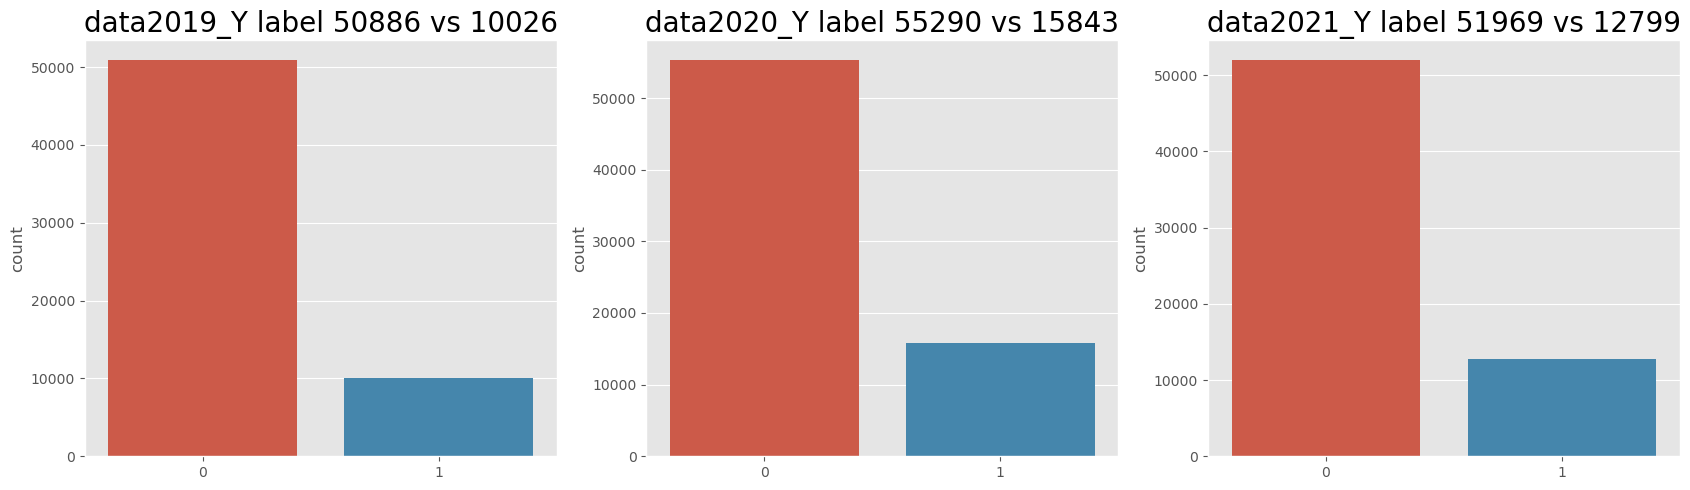

In [20]:
import seaborn as sns

count=sum(data2019_Y==1)
print("{:=^50}".format(" data2019_Y 의 label "))
print("1의 개수:{}, 0의 개수:{}, 1의 비율:{}".format(count, len(data2019_Y)-count, (count/len(data2019_Y))))

count=sum(data2020_Y==1)
print("{:=^50}".format(" data2020_Y 의 label "))
print("1의 개수:{}, 0의 개수:{}, 1의 비율:{}".format(count, len(data2020_Y)-count, (count/len(data2020_Y))))

count=sum(data2021_Y==1)
print("{:=^50}".format(" data2021_Y 의 label "))
print("1의 개수:{}, 0의 개수:{}, 1의 비율:{}".format(count, len(data2021_Y)-count, (count/len(data2021_Y))))

plt.style.use('ggplot')
fig = plt.figure(figsize=(17, 5), dpi=100)
ax1, ax2, ax3 = fig.subplots(1, 3).flatten()

sns.countplot(list(map(int,data2019_Y)), ax=ax1)
sns.countplot(list(map(int,data2020_Y)), ax=ax2)
sns.countplot(list(map(int,data2021_Y)), ax=ax3)

ax1.set_title(f"data2019_Y label {list(data2019_Y).count(0)} vs {list(data2019_Y).count(1)}", fontsize=20)
ax2.set_title(f"data2020_Y label {list(data2020_Y).count(0)} vs {list(data2020_Y).count(1)}", fontsize=20)
ax3.set_title(f"data2021_Y label {list(data2021_Y).count(0)} vs {list(data2021_Y).count(1)}", fontsize=20)


plt.tight_layout()
plt.show()

## xgb 모델 로드

__xgb.model 은 train(2017-2020), test(2021) 데이터셋으로 학습된 모델__

In [21]:
# xgb.model은 train, test 데이터로 학습된 모델
xgb_model = pickle.load(open('xgb.model', 'rb'))

data2019_prob = xgb_model.predict_proba(data2019_X)[:, 1]
data2019_pred = xgb_model.predict(data2019_X)
data2020_prob = xgb_model.predict_proba(data2020_X)[:, 1]
data2020_pred = xgb_model.predict(data2020_X)
data2021_prob = xgb_model.predict_proba(data2021_X)[:, 1]
data2021_pred = xgb_model.predict(data2021_X)

# plot_roc_curve(trainY, data2019_Y, train_pred, data2019_pred, train_prob, data2019_prob)
# plot_roc_curve(trainY, data2020_Y, train_pred, data2020_pred, train_prob, data2020_prob)
# plot_roc_curve(trainY, data2021_Y, train_pred, data2021_pred, train_prob, data2021_prob)

## shap_values 로드 

In [22]:
import pickle
with open('./year_data/shap_values_2019.pickle', 'rb') as f:
    shap_values_2019 = pickle.load(f)

In [23]:
import pickle
with open('./year_data/shap_values_2020.pickle', 'rb') as f:
    shap_values_2020 = pickle.load(f)

In [24]:
import pickle
with open('./year_data/shap_values_2021.pickle', 'rb') as f:
    shap_values_2021 = pickle.load(f)

In [25]:
shap_values_2019

array([[-8.1797590e-04,  1.2147729e-03, -2.6276656e-03, ...,
        -1.7179666e-02, -3.9524059e-03, -3.1026138e-02],
       [-3.1991120e-04, -2.3730358e-03, -1.7179748e-03, ...,
        -1.4247073e-02, -3.9686523e-03, -3.2220203e-02],
       [ 2.3887926e-03,  1.2087757e-03,  1.7457614e-05, ...,
        -1.4607704e-02, -3.7441878e-03, -3.2678436e-02],
       ...,
       [ 4.2637661e-03,  6.2935805e-04, -2.7945342e-03, ...,
        -8.3074206e-03,  5.9841317e-05,  7.5600920e-03],
       [-2.1647597e-03,  4.0139936e-04, -1.0904313e-02, ...,
        -1.1296561e-02, -1.1214738e-03,  2.1652561e-02],
       [-1.7535049e-03,  4.9520552e-04, -3.3527263e-03, ...,
        -1.6243216e-02, -1.3609962e-03,  2.0448830e-02]], dtype=float32)

### 컬럼 리스트

In [26]:
# 컬럼 리스트 생성
lst_col_info = []

for day in range(9, -1, -1): 
    lst_col_info += 'D-{0}_Open,D-{0}_High,D-{0}_Low,D-{0}_Close,D-{0}_Trading,D-{0}_MA5,D-{0}_MA20,D-{0}_MA60,D-{0}_MA120,D-{0}_VMAP,D-{0}_BHB,D-{0}_BLB,D-{0}_KCH,D-{0}_KCL,D-{0}_KCM,D-{0}_DCH,D-{0}_DCL,D-{0}_DCM,D-{0}_SMA,D-{0}_EMA,D-{0}_WMA,D-{0}_Ichimoku,D-{0}_Parabolic SAR,D-{0}_KAMA,D-{0}_MACD,D-{0}_Change,D-{0}_Volume,D-{0}_MFI,D-{0}_ADI,D-{0}_OBV,D-{0}_CMF,D-{0}_FI,D-{0}_EOM_EMV,D-{0}_VPT,D-{0}_NVI,D-{0}_ATR,D-{0}_UI,D-{0}_ADX,D-{0}_-VI,D-{0}_+VI,D-{0}_TRIX,D-{0}_MI,D-{0}_CCI,D-{0}_DPO,D-{0}_KST,D-{0}_STC,D-{0}_RSI,D-{0}_SRSI,D-{0}_TSI,D-{0}_UO,D-{0}_SR,D-{0}_WR,D-{0}_AO,D-{0}_ROC,D-{0}_PPO,D-{0}_PVO'.format(day).split(',')

### [origin] numpy -> dataframe 

In [27]:
##### 2019
df_data2019_X = pd.DataFrame(data2019_X)
df_data2019_X.columns = lst_col_info
df_data2019_Y = pd.DataFrame(data2019_Y)

##### 2020 
df_data2020_X = pd.DataFrame(data2020_X)
df_data2020_X.columns = lst_col_info
df_data2020_Y = pd.DataFrame(data2020_Y)

##### 2021
df_data2021_X = pd.DataFrame(data2021_X)
df_data2021_X.columns = lst_col_info
df_data2021_Y = pd.DataFrame(data2021_Y)

df_data2019_X.head()

D-9_Open  D-9_High   D-9_Low  D-9_Close    D-9_Trading   D-9_MA5  D-9_MA20  \
0  1.000000  1.016176  0.985294   0.985294  197242.088235  0.973824  1.002279   
1  1.000000  1.007463  0.977612   1.007463  108373.768657  0.997910  1.011493   
2  0.989630  1.025185  0.977778   0.989630  267000.094815  0.997926  0.996889   
3  0.998540  1.016058  0.998540   1.007299  232481.649635  1.003212  0.986496   
4  1.010145  1.031884  0.994203   1.031884  269047.257971  1.003188  0.982029   

   D-9_MA60  D-9_MA120  D-9_VMAP   D-9_BHB   D-9_BLB   D-9_KCH   D-9_KCL  \
0  1.095784   1.226446  1.005579  1.082598  0.921961  1.055760  0.964730   
1  1.109254   1.241082  1.021685  1.077226  0.945759  1.064726  0.972786   
2  1.098469   1.224037  1.013063  1.044128  0.949649  1.049432  0.957877   
3  1.072092   1.186788  0.986107  1.027004  0.945988  1.033747  0.950681   
4  1.061329   1.175097  0.982452  1.028292  0.935766  1.026473  0.946184   

    D-9_KCM   D-9_DCH   D-9_DCL   D-9_DCM   D-9_SMA   D-9_EMA   D-9_WMA  \
0  1.010245  1.132353  0.935294  1.017647  0.987868  0.992065  0.980033   
1  1.018756  1.116418  0.949254  1.026866  1.002612  1.006963  0.996153   
2  1.003654  1.108148  0.942222  1.019259  0.993580  0.998049  0.991704   
3  0.992214  1.091971  0.928467  0.988321  0.988078  0.994929  0.998508   
4  0.986329  1.084058  0.921739  0.990580  0.988406  0.994514  1.000419   

   D-9_Ichimoku  D-9_Parabolic SAR  D-9_KAMA  D-9_MACD  D-9_Change  \
0      1.031618           1.049442  0.995813 -0.035059   -0.014706   
1      1.047015           1.055838  1.010651 -0.032900    0.007463   
2      1.017407           1.035556  1.002422 -0.028755   -0.010370   
3      0.999270           1.013080  0.993172 -0.014209    0.007299   
4      0.996739           1.005739  0.989309 -0.009538    0.031884   

   D-9_Volume    D-9_MFI       D-9_ADI      D-9_OBV   D-9_CMF        D-9_FI  \
0    200186.0  60.127977 -2.845400e+08  491058052.0 -0.526172  7.035211e+04   
1    107571.0  61.053379 -2.844325e+08  491165623.0 -0.500859  8.286661e+05   
2    269798.0  56.262963 -2.846460e+08  491131810.0 -0.486325 -2.089164e+06   
3    230797.0  71.222616 -2.845095e+08  491452098.0 -0.409871  4.478842e+06   
4    260734.0  76.872507 -2.842487e+08  491712832.0 -0.344287  1.203350e+07   

    D-9_EOM_EMV      D-9_VPT     D-9_NVI     D-9_ATR    D-9_UI    D-9_ADX  \
0  5.245122e+05  2894.752906  188.345846  312.862228  9.722825  18.935113   
1 -2.881818e+07 -2141.143108  189.751412  304.800640  8.813659  18.296525   
2 -5.930363e+06 -2797.905185  189.751412  309.547491  7.733905  18.397150   
3  5.199374e+05 -1013.243583  189.467145  261.816610  4.796912  18.930617   
4  8.974664e+06  9997.907606  189.467145  261.686852  3.798560  19.707766   

    D-9_-VI   D-9_+VI  D-9_TRIX     D-9_MI     D-9_CCI  D-9_DPO     D-9_KST  \
0  0.948718  1.010684 -0.537142  25.161130  -32.795876    -65.5 -121.099761   
1  0.936975  0.978992 -0.524680  25.135236  -56.403144    -17.0 -117.798710   
2  1.008639  0.946004 -0.491216  25.199347  -22.246143    221.0 -114.427532   
3  1.094801  1.006116 -0.349367  25.002574   67.759563   -257.5  -68.020251   
4  0.874233  1.049080 -0.311160  24.872436  137.562941    -96.0  -58.163755   

     D-9_STC    D-9_RSI  D-9_SRSI    D-9_TSI     D-9_UO  ...  D-0_MA20  \
0  89.141383  41.708151  0.870063 -23.647201  23.617166  ...  0.982029   
1  94.570692  43.271107  0.941878 -22.215685  33.865077  ...  0.953020   
2  98.642673  41.465898  0.788975 -20.513082  34.245441  ...  0.974140   
3  99.957584  49.196749  0.956888 -11.389444  42.822222  ...  0.982668   
4  99.978792  55.838140  1.000000  -7.921780  53.130167  ...  0.965804   

   D-0_MA60  D-0_MA120  D-0_VMAP   D-0_BHB   D-0_BLB   D-0_KCH   D-0_KCL  \
0  1.061329   1.175097  0.982452  1.028292  0.935766  1.026473  0.946184   
1  1.025702   1.135393  0.956739  0.999077  0.906962  0.996138  0.918890   
2  1.041977   1.152065  0.984007  1.024357  0.923924  1.011246  0.942908   
3  1.035687   1.131194  0

### [shap] numpy -> dataframe

In [28]:
##### 2019
df_shap_2019 = pd.DataFrame(shap_values_2019)
df_shap_2019.columns = lst_col_info

##### 2020
df_shap_2020 = pd.DataFrame(shap_values_2020)
df_shap_2020.columns = lst_col_info

##### 2021
df_shap_2021 = pd.DataFrame(shap_values_2021)
df_shap_2021.columns = lst_col_info

#### df가 맞는지 확인  - 절댓값 씌운 후 컬럼 별 합 내림차순 정렬이 summary plot과 같은지 확인 

In [29]:
pd.DataFrame(df_shap_2019.apply(lambda x: abs(x)).sum().sort_values(ascending=False)).head(10)

0
D-0_High     7792.893555
D-0_KCL      6992.355957
D-0_DCH      6340.408203
D-0_Close    1850.875244
D-0_MA120    1730.787964
D-0_Trading  1220.923462
D-0_SR       1163.227661
D-0_PVO      1100.709106
D-4_Low      1042.903687
D-0_MA5      1018.443665

# summary plot

### shap value 계산 

In [30]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)

### 2019

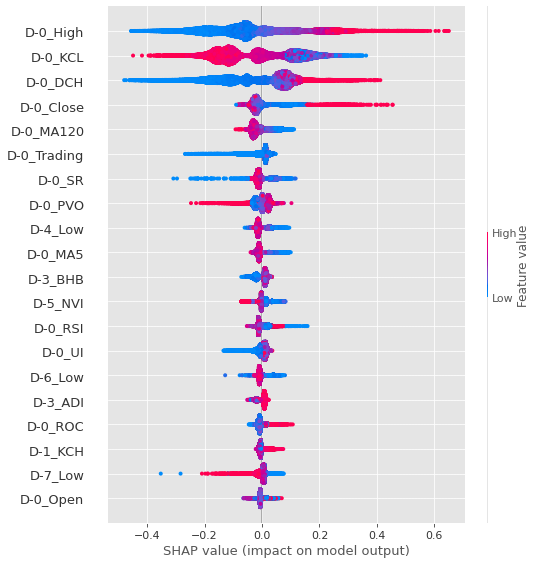

In [31]:
shap.summary_plot(shap_values_2019, df_data2019_X)

### 2020

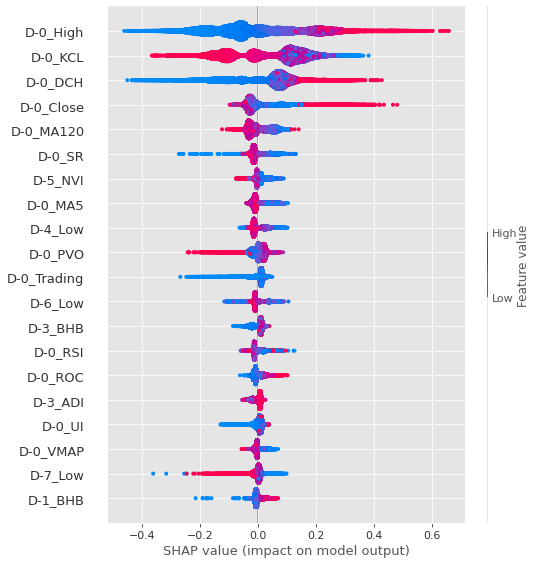

In [32]:
shap.summary_plot(shap_values_2020, df_data2020_X)

### 2021

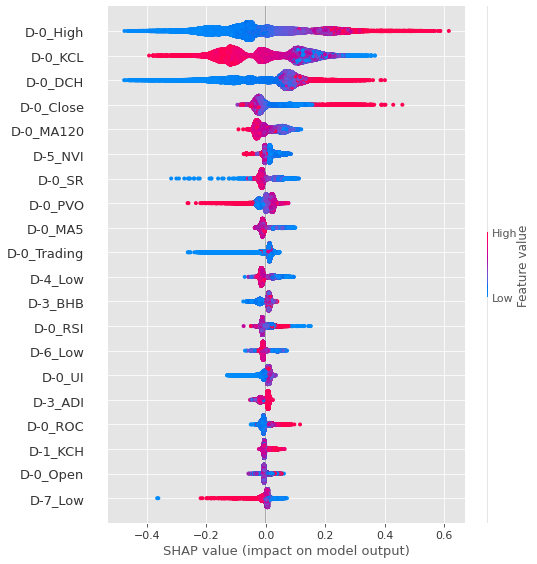

In [33]:
shap.summary_plot(shap_values_2021, df_data2021_X)

--------

# TSNE & Clustering -  original 데이터 
- (row num) x 560 -> (row num) x 2  

### __tsne__
   - 공식 문서:  https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
   - 예제 참고: https://jimmy-ai.tistory.com/126

<br>

### Clustering 
#### 비계층적 군집분석, Non-Hierarchical Clustering 
예제 참고: https://yganalyst.github.io/ml/ML_clustering/ 
- __중심 기반, Center-based__ <br>
: K-means
    - 공식 문서: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


- __밀도 기반, density based__  <br>
: DBSCAN (density-based spatial clustering of applications with noise)
    - 공식 문서: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


#### 계층적 군집분석,  hierarchical clustering

---------

### 함수 

- __tsne__ 함수

In [31]:
plt.style.use('default')

In [32]:
from sklearn.manifold import TSNE

def tsne_plot(np_tsne, df_data_Y, alpha=0.4, size=3):
    # numpy array -> Dataframe 
    df_tsne = pd.DataFrame(np_tsne, columns=['component0', 'component1'])

    # class target 정보 불러오기
    df_tsne['target'] = df_data_Y[0]

    # target 별 분리 
    df_tsne_0 = df_tsne[df_tsne['target']==0]
    df_tsne_1 = df_tsne[df_tsne['target']==1]

    # target 별 시각화 
    plt.scatter(df_tsne_0['component0'], df_tsne_0['component1'], color = 'green', label = 'class 0', alpha=alpha, s=size)
    plt.scatter(df_tsne_1['component0'], df_tsne_1['component1'], color = 'pink', label = 'class 1', alpha=alpha, s=size)

    plt.xlabel('component 0')
    plt.ylabel('component 1')
    plt.legend()
    plt.show()    

- __clustering 함수__

In [35]:
def clustering_plot(method, np_tsne, dendrogram_yn='n', n_clusters=5, min_samples=5, alpha=0.3, size=4):
    # method - k: kmeans, d: DBSCAN, h: hierarchical
    if method == 'k':
        from sklearn.cluster import KMeans
        import matplotlib.pyplot as plt
        km = KMeans(n_clusters = n_clusters, random_state=42)
        km.fit(np_tsne)    
        new_labels = km.labels_
        plt.title("K-means", fontsize=15)
        scatter = plt.scatter(np_tsne[:, 0], np_tsne[:, 1], c=new_labels, cmap='gist_rainbow', s=size, alpha=alpha, )
        plt.legend(*scatter.legend_elements())
        return new_labels
        
        
    elif method == 'd':
        from sklearn.cluster import DBSCAN
        import matplotlib.pyplot as plt
        clusters = DBSCAN(eps=0.3, min_samples=min_samples).fit(np_tsne)
        plt.title("DBSCAN", fontsize=15)
        scatter = plt.scatter(np_tsne[:, 0],np_tsne[:, 1],c=clusters.labels_, cmap='gist_rainbow', s=size, alpha=alpha)
        plt.grid()
        plt.legend(*scatter.legend_elements())
        plt.show()
        return clusters

    elif method == 'h':
        from scipy.cluster.hierarchy import linkage, dendrogram
        import matplotlib.pyplot as plt
        clusters = linkage(y=np_tsne, method='complete', metric='euclidean')
        print("linkage complete")
        
#         plt.figure( figsize = (25, 10) )
        if dendrogram_yn == 'y':
            plt.title("hierarchical", fontsize=15)
            dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
            plt.show() 
            
        return clusters 
        
    else:
        print("method를 잘못 입력하였습니다.")

## 2019

### tsne 

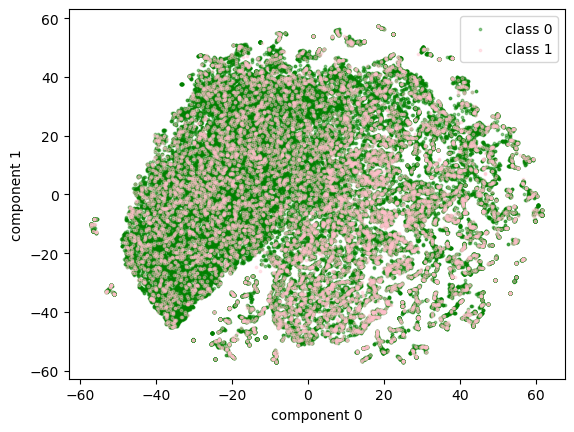

In [37]:
import pickle
with open('./year_data/np_tsne_2019.pickle', 'rb') as f:
    np_tsne_2019 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_2019, df_data_Y=df_data2019_Y)

### clustering - K-means 

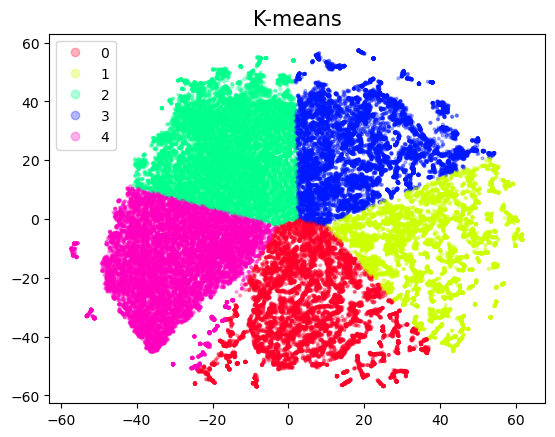

In [38]:
clusters_k_2019 = clustering_plot('k', np_tsne_2019)

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

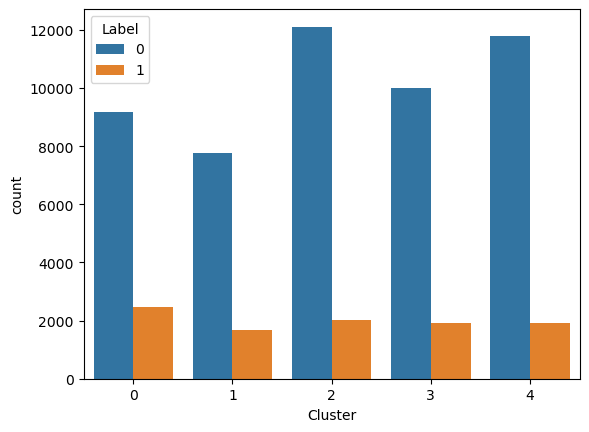

In [39]:
df_2019 = pd.DataFrame(data2019_X)
df_2019.columns = lst_col_info
df_2019['Code'] = lst_2019_cd
df_2019['Date'] = lst_2019_dt
df_2019['Label'] = df_data2019_Y[0]
df_2019['Cluster'] = clusters_k_2019
df_2019 = df_2019[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_2019.head()
sns.countplot(data=df_2019, x='Cluster', hue='Label')

### clustering - Density-based 

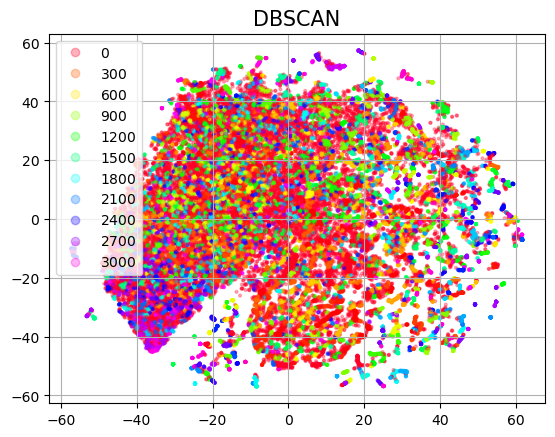

DBSCAN(eps=0.3)

In [40]:
clustering_plot('d', np_tsne_2019)

### clustering - hierarchical

linkage complete


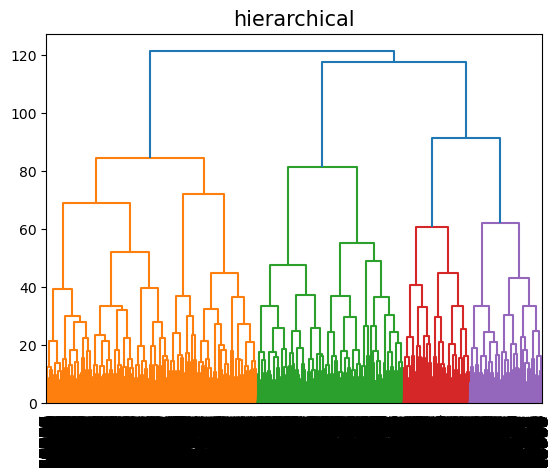

In [41]:
clusters_2019 = clustering_plot('h', np_tsne_2019, dendrogram_yn='y')

In [42]:
# dendrogram 시각화 오래걸리므로 최초 dendrogram 확인 이후에는 dendrogram_yn='n' 으로 설정
clusters_2019 = clustering_plot('h', np_tsne_2019, dendrogram_yn='n')

linkage complete


- dendrogram을 보고 적절한 t 값 설정 (색깔 별 군집이 형성되도록)

군집의 개수:  5


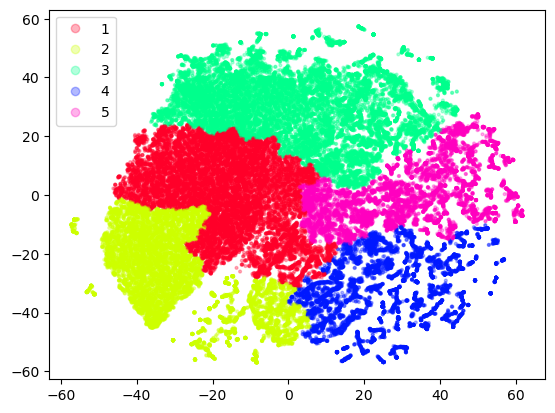

In [55]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree_2019 = fcluster(clusters_2019, t=83, criterion='distance')
print("군집의 개수: ", len(pd.DataFrame(cut_tree_2019)[0].unique()))
scatter = plt.scatter(x=np_tsne_2019[:, 0], y=np_tsne_2019[:, 1], c=cut_tree_2019, cmap='gist_rainbow', s=4, alpha=0.3)
plt.legend(*scatter.legend_elements())

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

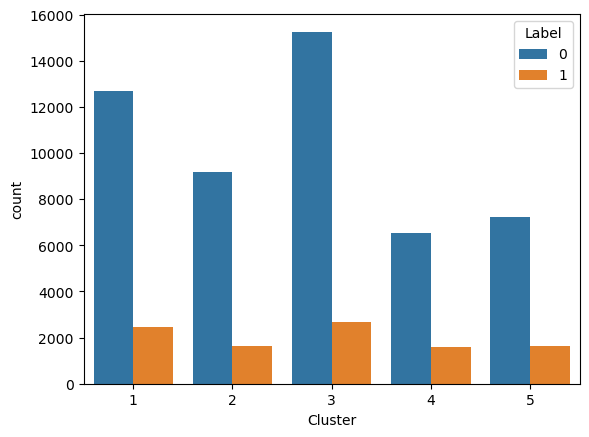

In [56]:
df_2019 = pd.DataFrame(data2019_X)
df_2019.columns = lst_col_info
df_2019['Code'] = lst_2019_cd
df_2019['Date'] = lst_2019_dt
df_2019['Label'] = df_data2019_Y[0]
df_2019['Cluster'] = cut_tree_2019
df_2019 = df_2019[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_2019.head()
sns.countplot(data=df_2019, x='Cluster', hue='Label')

## 2020 

### tsne

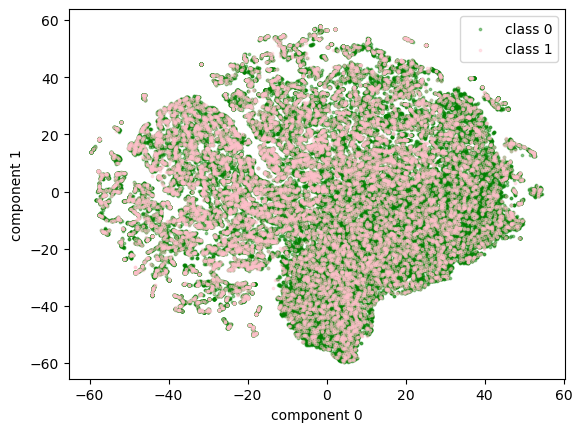

In [71]:
import pickle
with open('./year_data/np_tsne_2020.pickle', 'rb') as f:
    np_tsne_2020 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_2020, df_data_Y=df_data2020_Y)

### clustering - K-means 

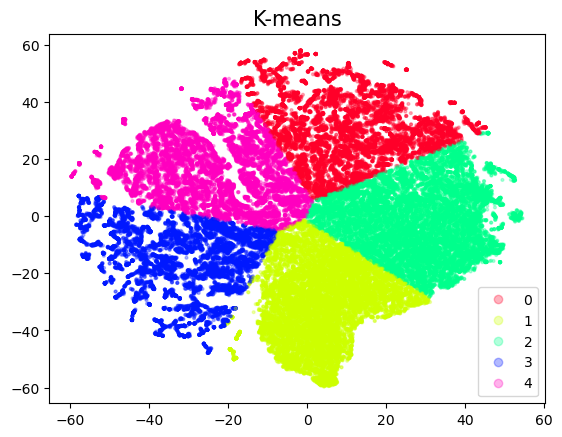

In [46]:
clusters_k_2020 = clustering_plot('k', np_tsne_2020)

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

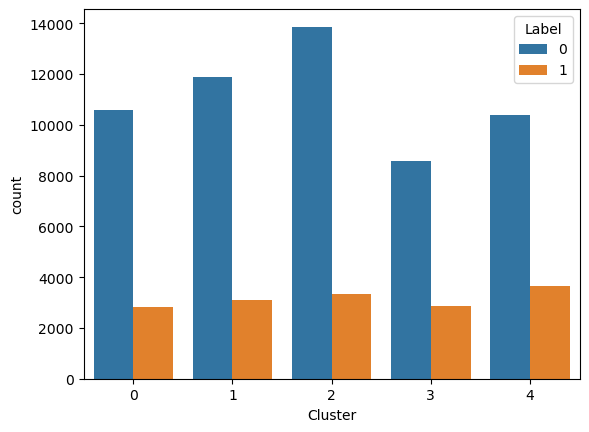

In [57]:
df_2020 = pd.DataFrame(data2020_X)
df_2020.columns = lst_col_info
df_2020['Code'] = lst_2020_cd
df_2020['Date'] = lst_2020_dt
df_2020['Label'] = df_data2020_Y[0]
df_2020['Cluster'] = clusters_k_2020
df_2020 = df_2020[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_2020.head()
sns.countplot(data=df_2020, x='Cluster', hue='Label')

### clustering - Density-based 

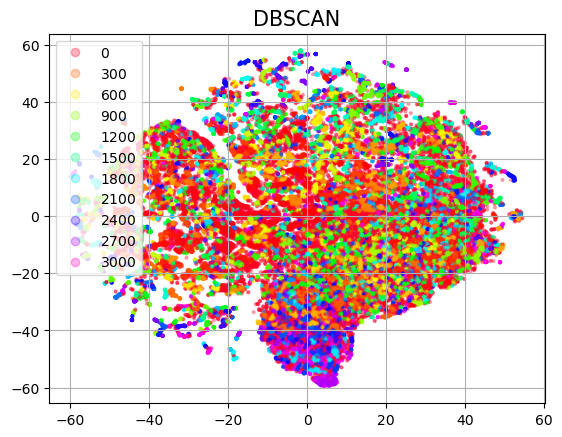

DBSCAN(eps=0.3)

In [58]:
clustering_plot('d', np_tsne_2020)

### clustering - hierarchical

linkage complete


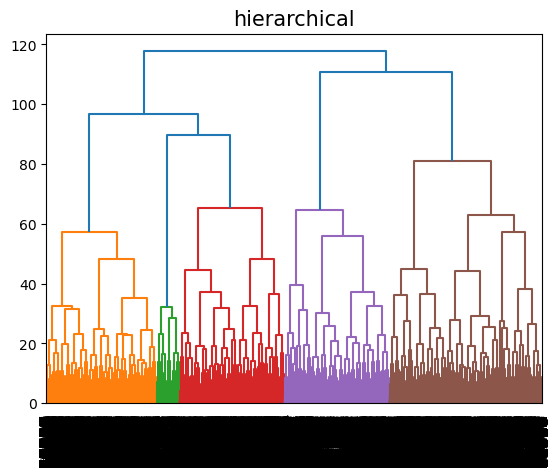

In [72]:
clusters_2020 = clustering_plot('h', np_tsne_2020, dendrogram_yn='y')

In [60]:
# dendrogram 시각화 오래걸리므로 최초 dendrogram 확인 이후에는 dendrogram_yn='n' 으로 설정
clusters_2020 = clustering_plot('h', np_tsne_2020, dendrogram_yn='n')

linkage complete


- dendrogram을 보고 적절한 t 값 설정 (색깔 별 군집이 형성되도록)

군집의 개수:  5


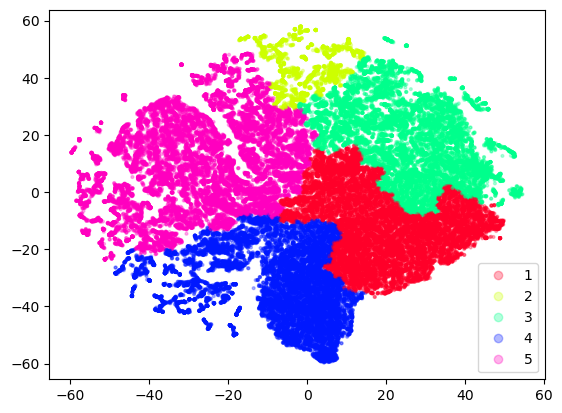

In [93]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree_2020 = fcluster(clusters_2020, t=89, criterion='distance') 
print("군집의 개수: ", len(pd.DataFrame(cut_tree_2020)[0].unique()))
scatter = plt.scatter(x=np_tsne_2020[:, 0], y=np_tsne_2020[:, 1], c=cut_tree_2020, cmap='gist_rainbow', s=4, alpha=0.3)
plt.legend(*scatter.legend_elements())

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

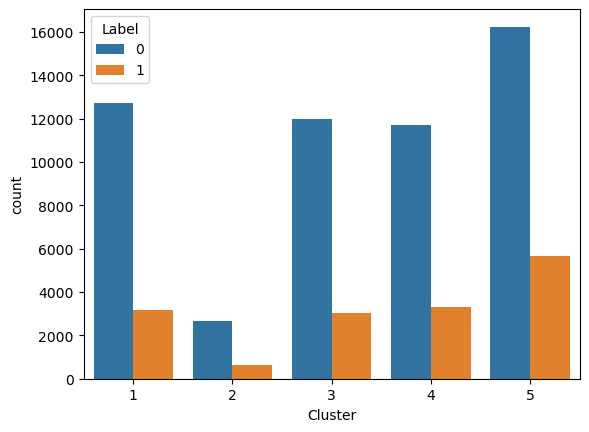

In [85]:
df_2020 = pd.DataFrame(data2020_X)
df_2020.columns = lst_col_info
df_2020['Code'] = lst_2020_cd
df_2020['Date'] = lst_2020_dt
df_2020['Label'] = df_data2020_Y[0]
df_2020['Cluster'] = cut_tree_2020
df_2020 = df_2020[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_2020.head()
sns.countplot(data=df_2020, x='Cluster', hue='Label')

## 2021

### tsne 

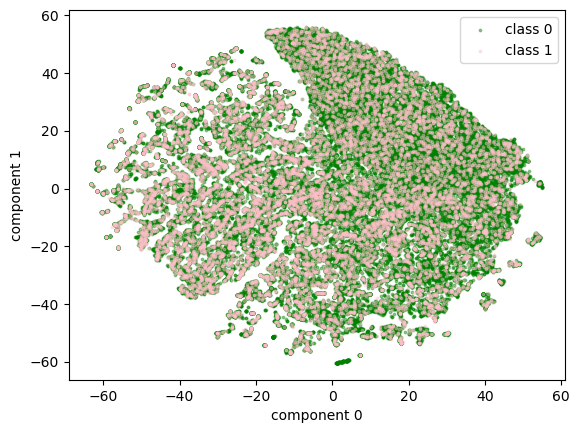

In [65]:
import pickle
with open('./year_data/np_tsne_2021.pickle', 'rb') as f:
    np_tsne_2021 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_2021, df_data_Y=df_data2021_Y)

### clustering - K-means 

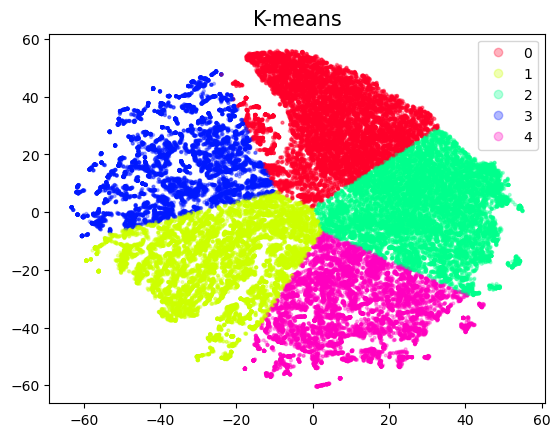

In [66]:
clusters_k_2021 = clustering_plot('k', np_tsne_2021)

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

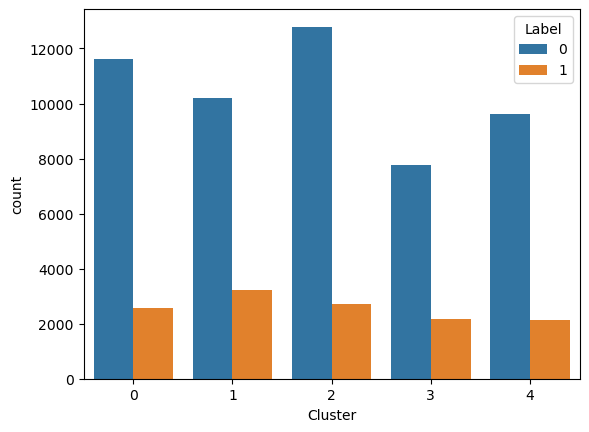

In [67]:
df_2021 = pd.DataFrame(data2021_X)
df_2021.columns = lst_col_info
df_2021['Code'] = lst_2021_cd
df_2021['Date'] = lst_2021_dt
df_2021['Label'] = df_data2021_Y[0]
df_2021['Cluster'] = clusters_k_2021
df_2021 = df_2021[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_2021.head()
sns.countplot(data=df_2021, x='Cluster', hue='Label')

### clustering - Density-based 

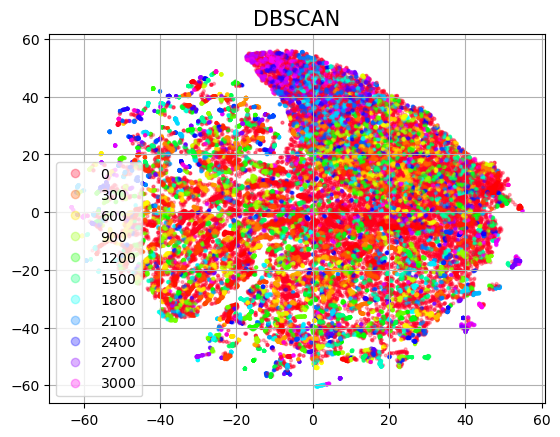

DBSCAN(eps=0.3)

In [68]:
clustering_plot('d', np_tsne_2021)

### clustering - hierarchical

linkage complete


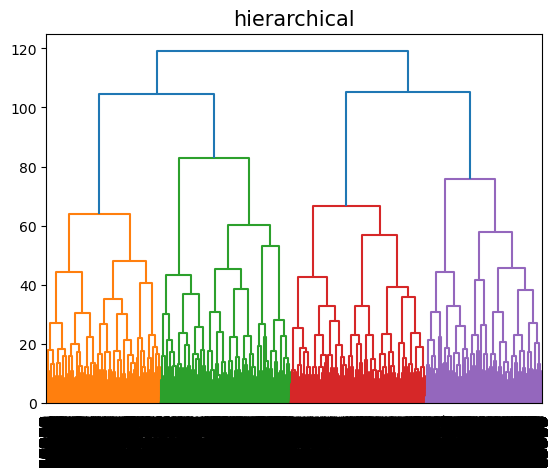

In [73]:
clusters_2021 = clustering_plot('h', np_tsne_2021, dendrogram_yn='y')

In [74]:
# dendrogram 시각화 오래걸리므로 최초 dendrogram 확인 이후에는 dendrogram_yn='n' 으로 설정
clusters_2021 = clustering_plot('h', np_tsne_2021, dendrogram_yn='n')

linkage complete


- dendrogram을 보고 적절한 t 값 설정 (색깔 별 군집이 형성되도록)

군집의 개수: 5


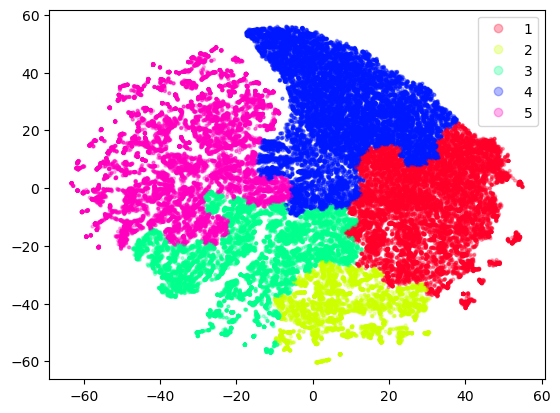

In [86]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree_2021 = fcluster(clusters_2021, t=80, criterion='distance')
print("군집의 개수:", len(pd.DataFrame(cut_tree_2021)[0].unique()))
scatter = plt.scatter(x=np_tsne_2021[:, 0], y=np_tsne_2021[:, 1], c=cut_tree_2021, cmap='gist_rainbow', s=4, alpha=0.3)
plt.legend(*scatter.legend_elements())

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

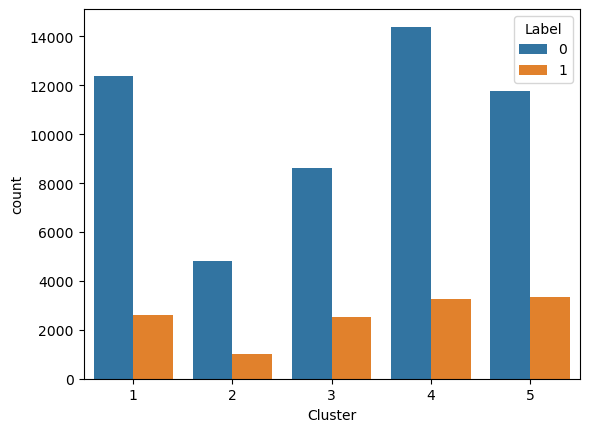

In [87]:
df_2021 = pd.DataFrame(data2021_X)
df_2021.columns = lst_col_info
df_2021['Code'] = lst_2021_cd
df_2021['Date'] = lst_2021_dt
df_2021['Label'] = df_data2021_Y[0]
df_2021['Cluster'] = cut_tree_2021
df_2021 = df_2021[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_2021.head()
sns.countplot(data=df_2021, x='Cluster', hue='Label')

# TSNE & Clustering - shap value 데이터 
- (row num) x 560 -> (row num) x 2  

## 2019

### tsne

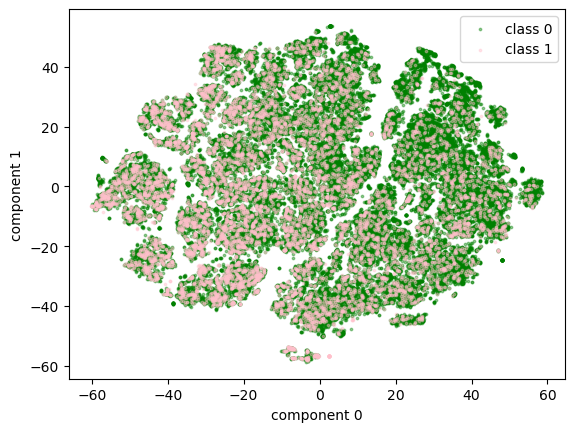

In [77]:
import pickle
with open('./year_data/np_tsne_shap_2019.pickle', 'rb') as f:
    np_tsne_shap_2019 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_shap_2019, df_data_Y=df_data2019_Y)

### clustering - K-means 

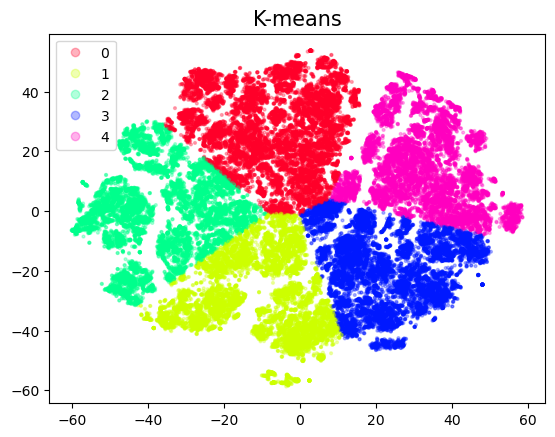

In [78]:
cluster_shap_k_2019 = clustering_plot('k', np_tsne_shap_2019)

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

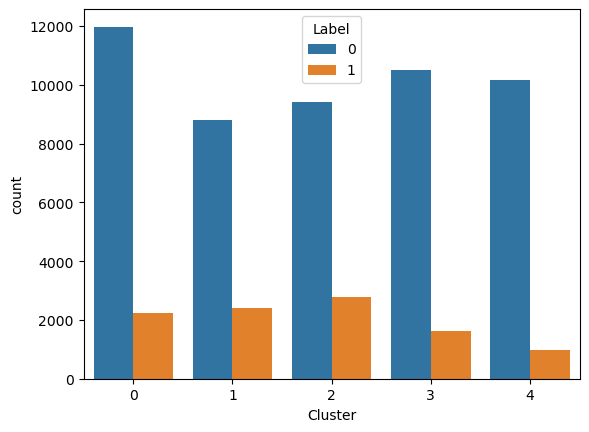

In [79]:
df_shap_2019['Code'] = lst_2019_cd
df_shap_2019['Date'] = lst_2019_dt
df_shap_2019['Label'] = df_data2019_Y[0]
df_shap_2019['Cluster'] = cluster_shap_k_2019
df_shap_2019 = df_shap_2019[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_shap_2019.head()
sns.countplot(data=df_shap_2019, x='Cluster', hue='Label')

### clustering - Density-based 

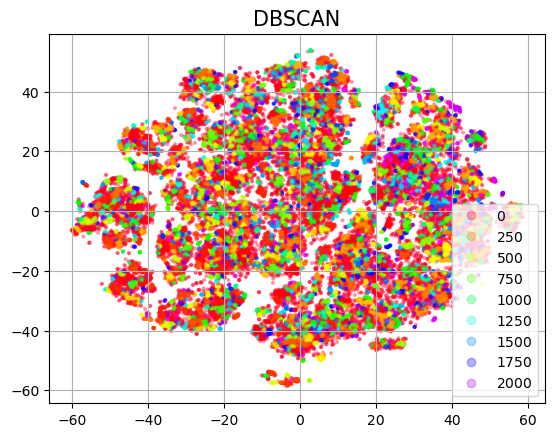

DBSCAN(eps=0.3)

In [80]:
clustering_plot('d', np_tsne_shap_2019)

### clustering - hierarchical

linkage complete


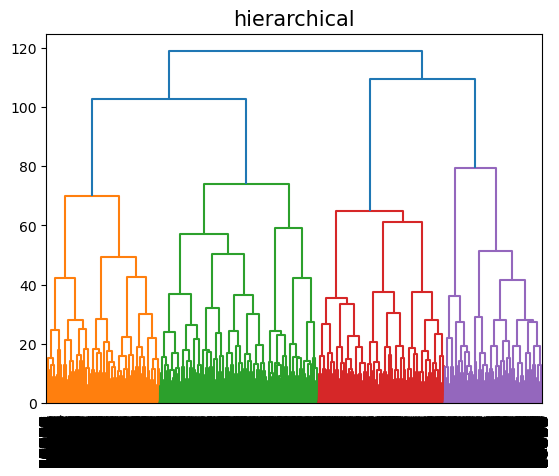

In [94]:
clusters_shap_2019 = clustering_plot('h', np_tsne_shap_2019, dendrogram_yn='y')

In [95]:
# dendrogram 시각화 오래걸리므로 최초 dendrogram 확인 이후에는 dendrogram_yn='n' 으로 설정
clusters_shap_2019 = clustering_plot('h', np_tsne_shap_2019, dendrogram_yn='n')

linkage complete


- dendrogram을 보고 적절한 t 값 설정 (색깔 별 군집이 형성되도록)

군집의 개수: 5


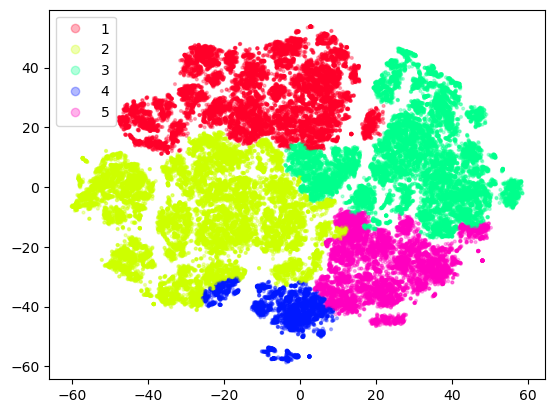

In [103]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree_shap_2019 = fcluster(clusters_shap_2019, t=79, criterion='distance')
print("군집의 개수:", len(pd.DataFrame(cut_tree_shap_2019)[0].unique()))
scatter = plt.scatter(x=np_tsne_shap_2019[:, 0], y=np_tsne_shap_2019[:, 1], c=cut_tree_shap_2019, cmap='gist_rainbow', s=4, alpha=0.3)
plt.legend(*scatter.legend_elements())

- kmeans와 동일하게 군집의 개수를 6개로 그려 봄

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

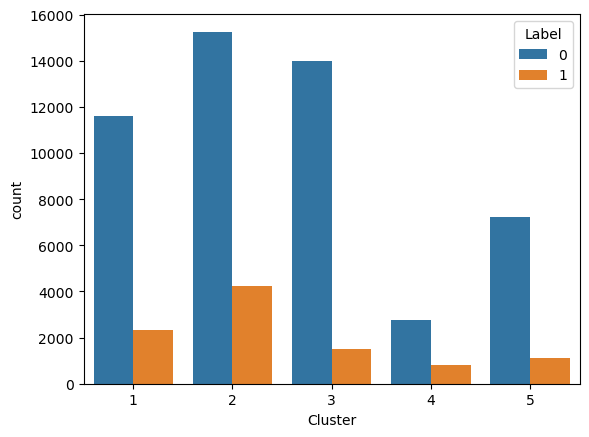

In [104]:
df_shap_2019['Code'] = lst_2019_cd
df_shap_2019['Date'] = lst_2019_dt
df_shap_2019['Label'] = df_data2019_Y[0]
df_shap_2019['Cluster'] = cut_tree_shap_2019
df_shap_2019 = df_shap_2019[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_shap_2019.head()
sns.countplot(data=df_shap_2019, x='Cluster', hue='Label')

## 2020

### tsne

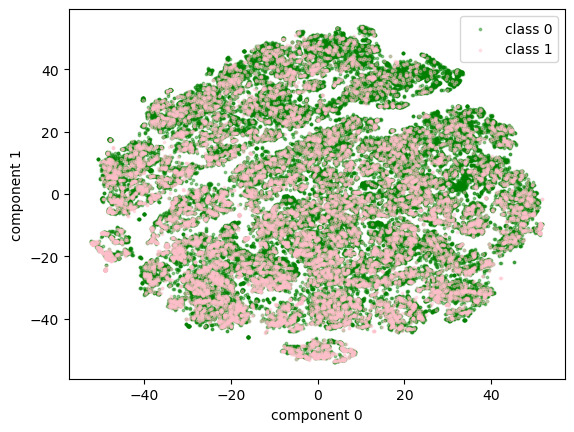

In [33]:
import pickle
with open('./year_data/np_tsne_shap_2020.pickle', 'rb') as f:
    np_tsne_shap_2020 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_shap_2020, df_data_Y=df_data2020_Y)

### clustering - K-means 

In [34]:
clusters_k_shap_2020 = clustering_plot('k', np_tsne_shap_2020)

NameError: name 'clustering_plot' is not defined

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

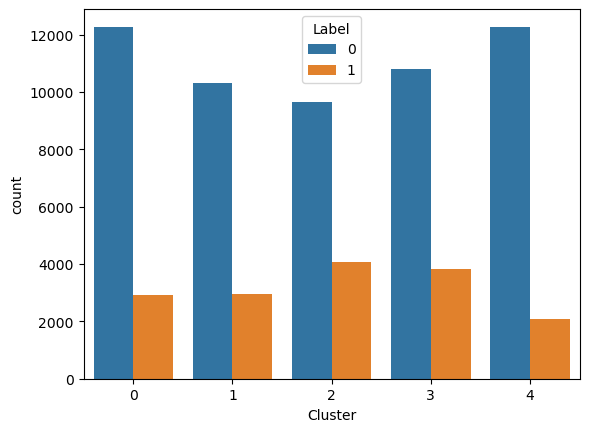

In [107]:
df_shap_2020['Code'] = lst_2020_cd
df_shap_2020['Date'] = lst_2020_dt
df_shap_2020['Label'] = df_data2020_Y[0]
df_shap_2020['Cluster'] = clusters_k_shap_2020
df_shap_2020 = df_shap_2020[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_shap_2020.head()
sns.countplot(data=df_shap_2020, x='Cluster', hue='Label')

In [109]:
# 1의 개수가 많은 cluster 2 날짜 확인 
# df_shap_2020[df_shap_2020['Cluster']==2]['Date'].value_counts()
df_shap_2020[(df_shap_2020['Cluster']==2)&(df_shap_2020['Label']==1)]['Date'].value_counts()
# -> 2020년 4월인 구간임 

20200408    232
20200407    129
20200409    109
20200406     69
20200403     64
20200414     45
20200504     45
20200904     43
20200417     43
20200522     38
20200421     37
20200424     35
20200410     34
20200427     34
20200911     32
20200828     32
20200420     32
20200903     31
20200826     30
20200429     30
20200512     29
20200807     28
20200721     28
20200422     28
20200525     28
20200910     28
20200717     28
20201117     27
20200602     27
20200908     27
20200526     27
20200506     26
20200507     26
20200508     26
20200909     26
20200731     26
20200423     26
20200601     25
20200709     25
20200608     24
20200810     24
20200519     23
20200729     23
20200515     23
20201230     23
20200818     23
20200720     23
20200520     23
20200518     22
20200511     22
20200915     22
20201203     22
20200413     22
20200521     22
20200803     21
20200901     21
20200827     21
20200724     21
20201218     20
20201216     20
20200123     20
20200821     20
20200722

### clustering - Density-based 

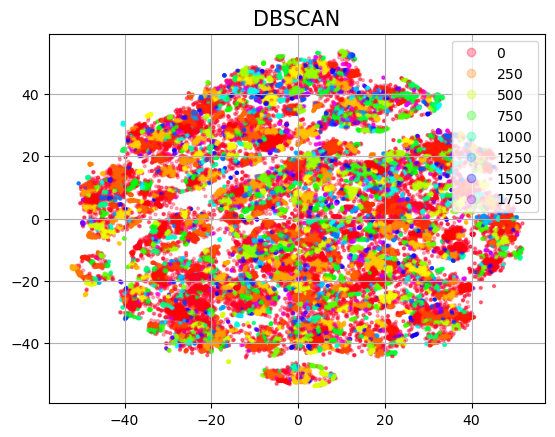

DBSCAN(eps=0.3)

In [110]:
clustering_plot('d', np_tsne_shap_2020)

### clustering - hierarchical

linkage complete


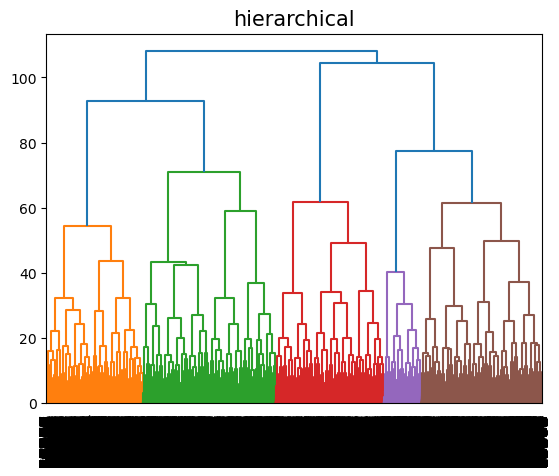

In [111]:
clusters_shap_2020 = clustering_plot('h', np_tsne_shap_2020, dendrogram_yn='y')

In [36]:
# dendrogram 시각화 오래걸리므로 최초 dendrogram 확인 이후에는 dendrogram_yn='n' 으로 설정
clusters_shap_2020 = clustering_plot('h', np_tsne_shap_2020, dendrogram_yn='n')

linkage complete


- dendrogram을 보고 적절한 t 값 설정 (색깔 별 군집이 형성되도록)

군집의 개수: 5


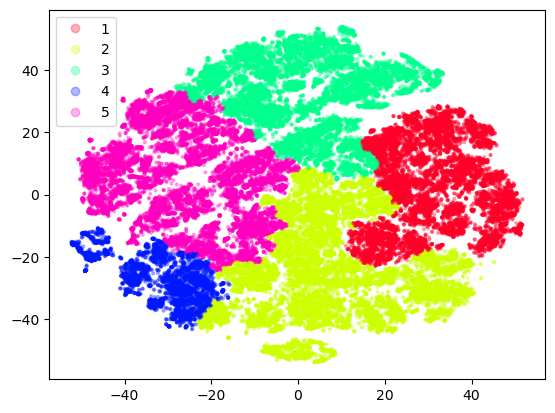

In [120]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree_shap_2020 = fcluster(clusters_shap_2020, t=77, criterion='distance')
print("군집의 개수:", len(pd.DataFrame(cut_tree_shap_2020)[0].unique()))
scatter = plt.scatter(x=np_tsne_shap_2020[:, 0], y=np_tsne_shap_2020[:, 1], c=cut_tree_shap_2020, cmap='gist_rainbow', s=4, alpha=0.3)
plt.legend(*scatter.legend_elements())

- kmeans와 동일하게 군집의 개수를 6개로 그려 봄 (노란 부분을 3개로 나눔)

군집의 개수: 4


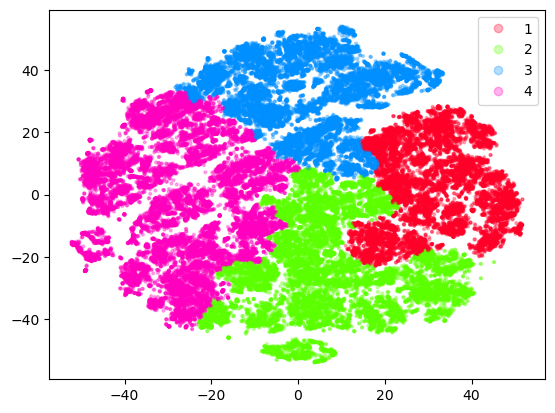

In [37]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree_shap_2020 = fcluster(clusters_shap_2020, t=83, criterion='distance')
print("군집의 개수:", len(pd.DataFrame(cut_tree_shap_2020)[0].unique()))
scatter = plt.scatter(x=np_tsne_shap_2020[:, 0], y=np_tsne_shap_2020[:, 1], c=cut_tree_shap_2020, cmap='gist_rainbow', s=4, alpha=0.3)
plt.legend(*scatter.legend_elements())

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

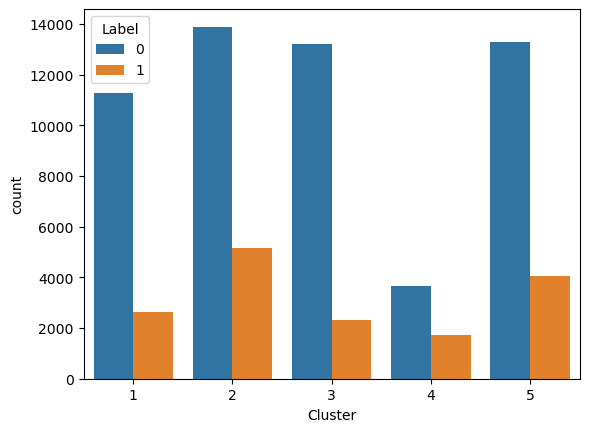

In [121]:
df_shap_2020['Code'] = lst_2020_cd
df_shap_2020['Date'] = lst_2020_dt
df_shap_2020['Label'] = df_data2020_Y[0]
df_shap_2020['Cluster'] = cut_tree_shap_2020
df_shap_2020 = df_shap_2020[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_shap_2020.head()
sns.countplot(data=df_shap_2020, x='Cluster', hue='Label')

## 2021 

### tsne

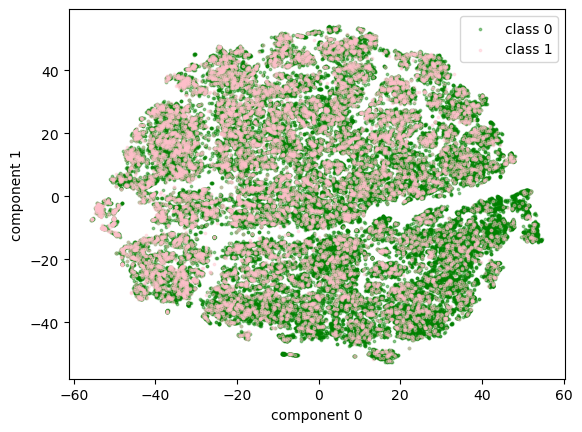

In [38]:
import pickle
with open('./year_data/np_tsne_shap_2021.pickle', 'rb') as f:
    np_tsne_shap_2021 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_shap_2021, df_data_Y=df_data2021_Y)

### clustering - K-means 

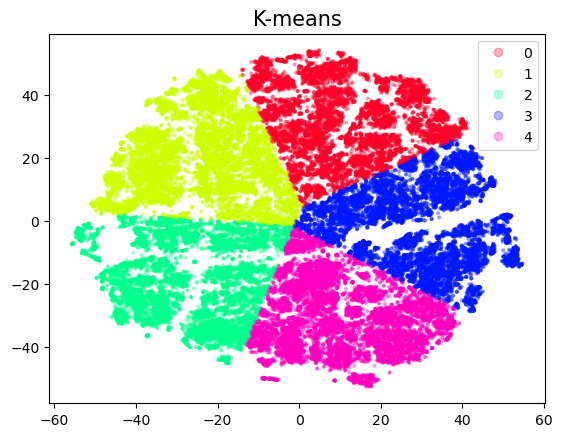

In [39]:
clusters_k_shap_2021 = clustering_plot('k', np_tsne_shap_2021)

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

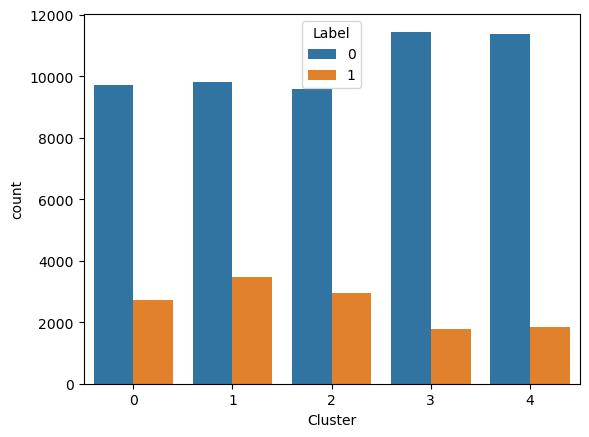

In [40]:
df_shap_2021['Code'] = lst_2021_cd
df_shap_2021['Date'] = lst_2021_dt
df_shap_2021['Label'] = df_data2021_Y[0]
df_shap_2021['Cluster'] = clusters_k_shap_2021
df_shap_2021 = df_shap_2021[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_shap_2021.head()
sns.countplot(data=df_shap_2021, x='Cluster', hue='Label')

### clustering - Density-based 

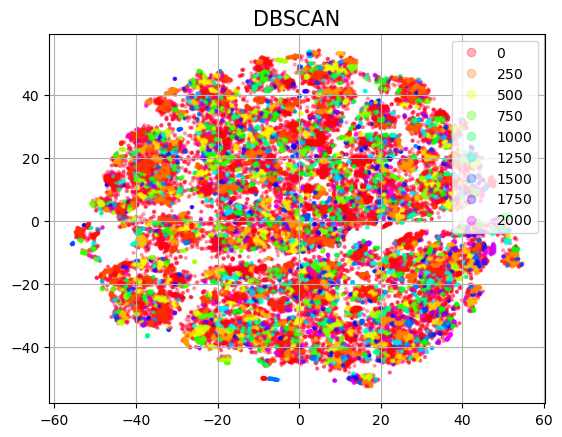

DBSCAN(eps=0.3)

In [41]:
clustering_plot('d', np_tsne_shap_2021)

### clustering - hierarchical

linkage complete


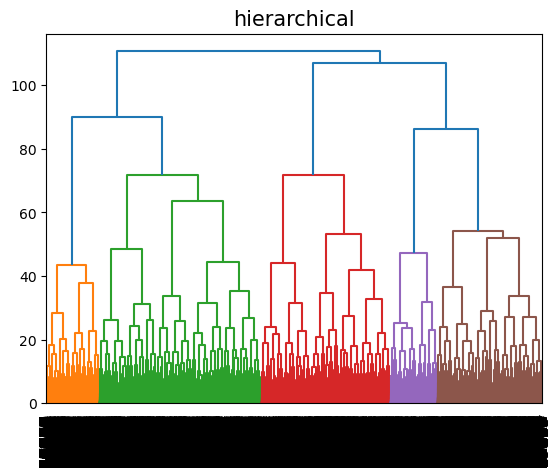

In [42]:
clusters_shap_2021 = clustering_plot('h', np_tsne_shap_2021, dendrogram_yn='y')

In [43]:
# dendrogram 시각화 오래걸리므로 최초 dendrogram 확인 이후에는 dendrogram_yn='n' 으로 설정
clusters_shap_2021 = clustering_plot('h', np_tsne_shap_2021, dendrogram_yn='n')

linkage complete


- dendrogram을 보고 적절한 t 값 설정 (색깔 별 군집이 형성되도록)

군집의 개수: 5


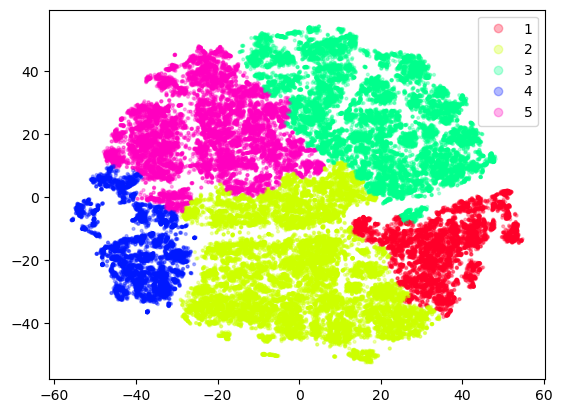

In [52]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

cut_tree_shap_2021 = fcluster(clusters_shap_2021, t=80, criterion='distance')
print("군집의 개수:", len(pd.DataFrame(cut_tree_shap_2021)[0].unique()))
scatter = plt.scatter(x=np_tsne_shap_2021[:, 0], y=np_tsne_shap_2021[:, 1], c=cut_tree_shap_2021, cmap='gist_rainbow', s=4, alpha=0.3)
plt.legend(*scatter.legend_elements())

#### 군집 별 데이터 확인 

<AxesSubplot:xlabel='Cluster', ylabel='count'>

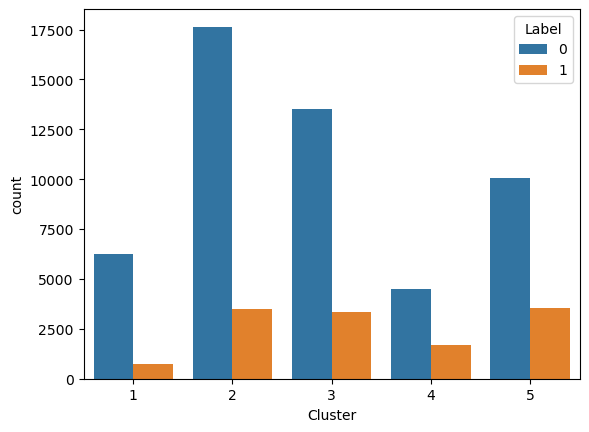

In [53]:
df_shap_2021['Code'] = lst_2021_cd
df_shap_2021['Date'] = lst_2021_dt
df_shap_2021['Label'] = df_data2021_Y[0]
df_shap_2021['Cluster'] = cut_tree_shap_2021
df_shap_2021 = df_shap_2021[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]
df_shap_2021.head()
sns.countplot(data=df_shap_2021, x='Cluster', hue='Label')

-------------------

# matrix_weighted_distance plot 함수

In [46]:
from sklearn.manifold import TSNE

def plot_matrix_weighted_distance(n=5000, df_data_shap=df_shap_2019, np_dataX=data2019_X, np_dataY=data2019_Y):
    np_weights = (df_data_shap.apply(lambda x: abs(x)).sum()).values
    
    np_tmp = np.zeros(shape=(n, n))
    
    for i in tqdm(range(n)):
        for j in range(i+1, n):
            dis = np.sqrt(np.sum(np_weights * ((np_dataX[i] - np_dataX[j])**2)))
            np_tmp[i][j] = dis
            np_tmp[j][i] = dis
    
    # 2차원 t-sne 임베딩
    np_tsne_dis = TSNE(n_components=2, n_jobs=40, random_state=42).fit_transform(np_tmp)

    # numpy array -> Dataframe 
    df_tsne_dis = pd.DataFrame(np_tsne_dis, columns=['component0', 'component1'])
    df_dataY = pd.DataFrame(np_dataY)
    
    # class target 정보 불러오기
    df_tsne_dis['target'] = df_dataY[0]

    # target 별 분리 
    df_tsne_dis_0 = df_tsne_dis[df_tsne_dis['target']==0]
    df_tsne_dis_1 = df_tsne_dis[df_tsne_dis['target']==1]

    # target 별 시각화 
    plt.scatter(df_tsne_dis_0['component0'], df_tsne_dis_0['component1'], color = 'green', label = 'class 0', alpha=0.5, s=4)
    plt.scatter(df_tsne_dis_1['component0'], df_tsne_dis_1['component1'], color = 'pink', label = 'class 1', alpha=0.5, s=4)

    plt.xlabel('component 0')
    plt.ylabel('component 1')
    plt.legend()
    plt.show()

## 2019

100%|█████████████████████████████████████████████████████████| 5000/5000 [01:59<00:00, 41.98it/s]


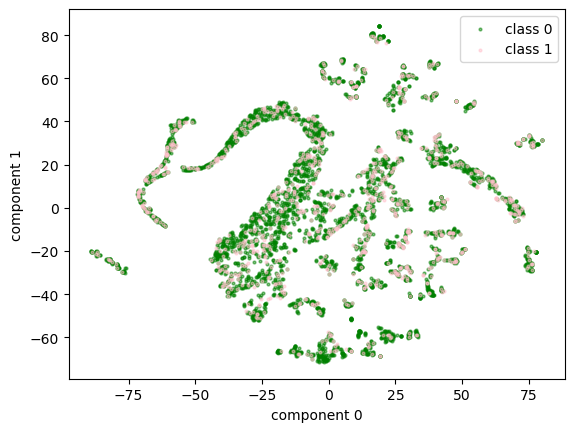

In [47]:
plot_matrix_weighted_distance(n=5000, df_data_shap=df_shap_2019, np_dataX=data2019_X, np_dataY=data2019_Y)

## 2020

100%|█████████████████████████████████████████████████████████| 5000/5000 [01:58<00:00, 42.24it/s]


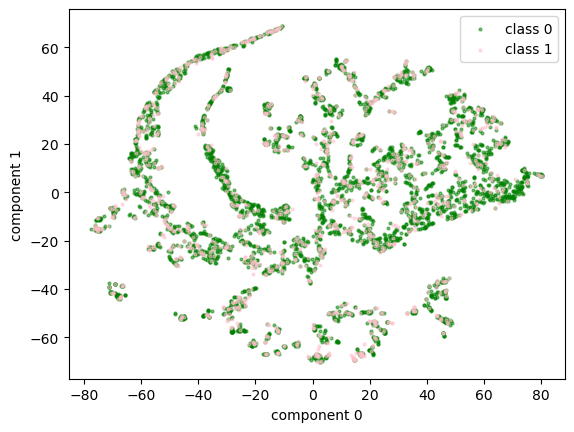

In [48]:
plot_matrix_weighted_distance(n=5000, df_data_shap=df_shap_2020, np_dataX=data2020_X, np_dataY=data2020_Y)

## 2021

In [50]:
plot_matrix_weighted_distance(n=5000, df_data_shap=df_shap_2021, np_dataX=data2021_X, np_dataY=data2021_Y)

TypeError: bad operand type for abs(): 'str'